Problem 9

In [1]:
import tensorflow as tf

In [2]:
DOWNLOAD_ROOT = "http://download.tensorflow.org/data/"
FILENAME = "quickdraw_tutorial_dataset_v1.tar.gz"
filepath = tf.keras.utils.get_file(FILENAME,
                                DOWNLOAD_ROOT + FILENAME,
                                cache_subdir="datasets/quickdraw",
                                extract=True)

In [3]:
from pathlib import Path

In [4]:
quickdraw_dir = Path(filepath).parent
train_files = sorted([str(path) for path in quickdraw_dir.glob("training.tfrecord-*")])
eval_files = sorted([str(path) for path in quickdraw_dir.glob("eval.tfrecord-*")])

In [5]:
train_files

['/Users/nickmatthew/.keras/datasets/quickdraw/training.tfrecord-00000-of-00010',
 '/Users/nickmatthew/.keras/datasets/quickdraw/training.tfrecord-00001-of-00010',
 '/Users/nickmatthew/.keras/datasets/quickdraw/training.tfrecord-00002-of-00010',
 '/Users/nickmatthew/.keras/datasets/quickdraw/training.tfrecord-00003-of-00010',
 '/Users/nickmatthew/.keras/datasets/quickdraw/training.tfrecord-00004-of-00010',
 '/Users/nickmatthew/.keras/datasets/quickdraw/training.tfrecord-00005-of-00010',
 '/Users/nickmatthew/.keras/datasets/quickdraw/training.tfrecord-00006-of-00010',
 '/Users/nickmatthew/.keras/datasets/quickdraw/training.tfrecord-00007-of-00010',
 '/Users/nickmatthew/.keras/datasets/quickdraw/training.tfrecord-00008-of-00010',
 '/Users/nickmatthew/.keras/datasets/quickdraw/training.tfrecord-00009-of-00010']

In [6]:
eval_files

['/Users/nickmatthew/.keras/datasets/quickdraw/eval.tfrecord-00000-of-00010',
 '/Users/nickmatthew/.keras/datasets/quickdraw/eval.tfrecord-00001-of-00010',
 '/Users/nickmatthew/.keras/datasets/quickdraw/eval.tfrecord-00002-of-00010',
 '/Users/nickmatthew/.keras/datasets/quickdraw/eval.tfrecord-00003-of-00010',
 '/Users/nickmatthew/.keras/datasets/quickdraw/eval.tfrecord-00004-of-00010',
 '/Users/nickmatthew/.keras/datasets/quickdraw/eval.tfrecord-00005-of-00010',
 '/Users/nickmatthew/.keras/datasets/quickdraw/eval.tfrecord-00006-of-00010',
 '/Users/nickmatthew/.keras/datasets/quickdraw/eval.tfrecord-00007-of-00010',
 '/Users/nickmatthew/.keras/datasets/quickdraw/eval.tfrecord-00008-of-00010',
 '/Users/nickmatthew/.keras/datasets/quickdraw/eval.tfrecord-00009-of-00010']

In [7]:
with open(quickdraw_dir / "eval.tfrecord.classes") as test_classes_file:
    test_classes = test_classes_file.readlines()
    
with open(quickdraw_dir / "training.tfrecord.classes") as train_classes_file:
    train_classes = train_classes_file.readlines()

In [8]:
assert train_classes == test_classes
class_names = [name.strip().lower() for name in train_classes]

In [9]:
sorted(class_names)

['aircraft carrier',
 'airplane',
 'alarm clock',
 'ambulance',
 'angel',
 'animal migration',
 'ant',
 'anvil',
 'apple',
 'arm',
 'asparagus',
 'axe',
 'backpack',
 'banana',
 'bandage',
 'barn',
 'baseball',
 'baseball bat',
 'basket',
 'basketball',
 'bat',
 'bathtub',
 'beach',
 'bear',
 'beard',
 'bed',
 'bee',
 'belt',
 'bench',
 'bicycle',
 'binoculars',
 'bird',
 'birthday cake',
 'blackberry',
 'blueberry',
 'book',
 'boomerang',
 'bottlecap',
 'bowtie',
 'bracelet',
 'brain',
 'bread',
 'bridge',
 'broccoli',
 'broom',
 'bucket',
 'bulldozer',
 'bus',
 'bush',
 'butterfly',
 'cactus',
 'cake',
 'calculator',
 'calendar',
 'camel',
 'camera',
 'camouflage',
 'campfire',
 'candle',
 'cannon',
 'canoe',
 'car',
 'carrot',
 'castle',
 'cat',
 'ceiling fan',
 'cell phone',
 'cello',
 'chair',
 'chandelier',
 'church',
 'circle',
 'clarinet',
 'clock',
 'cloud',
 'coffee cup',
 'compass',
 'computer',
 'cookie',
 'cooler',
 'couch',
 'cow',
 'crab',
 'crayon',
 'crocodile',
 'crow

In [10]:
def parse(data_batch):
    feature_descriptions = {
        "ink": tf.io.VarLenFeature(dtype=tf.float32),
        "shape": tf.io.FixedLenFeature([2], dtype=tf.int64),
        "class_index": tf.io.FixedLenFeature([1], dtype=tf.int64)
    }
    examples = tf.io.parse_example(data_batch, feature_descriptions)
    flat_sketches = tf.sparse.to_dense(examples["ink"])
    sketches = tf.reshape(flat_sketches, shape=[tf.size(data_batch), -1, 3])
    lengths = examples["shape"][:, 0]
    labels = examples["class_index"][:, 0]
    return sketches, lengths, labels

def quickdraw_dataset(filepaths, batch_size=32, shuffle_buffer_size=None,
                      n_parse_threads=5, n_read_threads=5, cache=False):
    dataset = tf.data.TFRecordDataset(filepaths,
                                      num_parallel_reads=n_read_threads)
    if cache:
        dataset = dataset.cache()
    if shuffle_buffer_size:
        dataset = dataset.shuffle(shuffle_buffer_size)
    dataset = dataset.batch(batch_size)
    dataset = dataset.map(parse, num_parallel_calls=n_parse_threads)
    return dataset.prefetch(1)

In [11]:
train_set = quickdraw_dataset(train_files, shuffle_buffer_size=10000)
valid_set = quickdraw_dataset(eval_files[:5])
test_set = quickdraw_dataset(eval_files[5:])

In [12]:
for sketches, lengths, labels in train_set.take(1):
    print("sketches =", sketches)
    print("lengths =", lengths)
    print("labels =", labels)

sketches = tf.Tensor(
[[[-0.10588236  0.14942528  0.        ]
  [-0.03137255  0.10344829  0.        ]
  [-0.02352941  0.18390805  0.        ]
  ...
  [ 0.          0.          0.        ]
  [ 0.          0.          0.        ]
  [ 0.          0.          0.        ]]

 [[-0.0669291   0.03111112  0.        ]
  [-0.01181102  0.03999996  0.        ]
  [ 0.09055114 -0.00444442  0.        ]
  ...
  [ 0.          0.          0.        ]
  [ 0.          0.          0.        ]
  [ 0.          0.          0.        ]]

 [[ 0.0333333   0.05905512  0.        ]
  [ 0.00833333  0.07086614  0.        ]
  [-0.13333333  0.37401575  0.        ]
  ...
  [ 0.          0.          0.        ]
  [ 0.          0.          0.        ]
  [ 0.          0.          0.        ]]

 ...

 [[-0.06310681 -0.00392157  0.        ]
  [-0.09708738  0.02352941  0.        ]
  [-0.1407767   0.07058823  0.        ]
  ...
  [ 0.          0.          0.        ]
  [ 0.          0.          0.        ]
  [ 0.          0.    

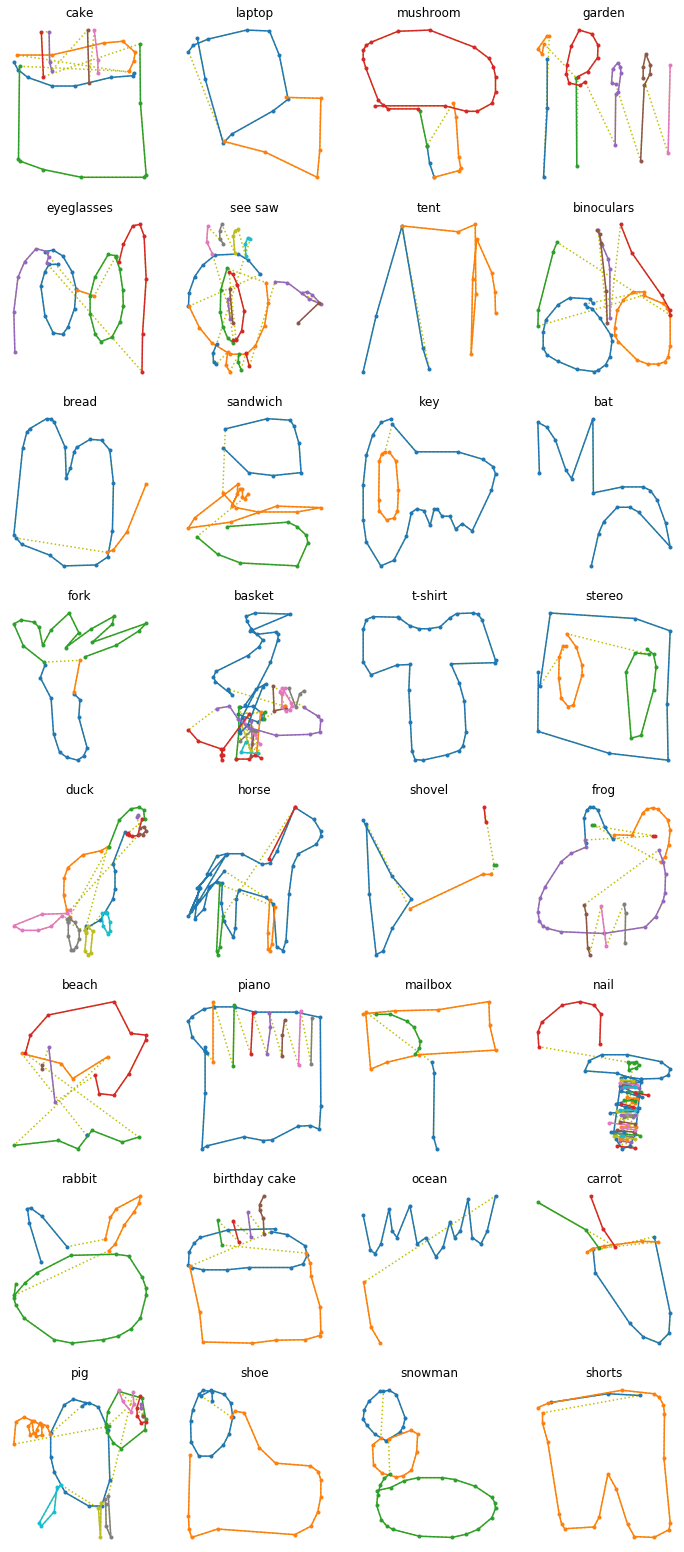

In [15]:
import matplotlib.pyplot as plt
import numpy as np
def draw_sketch(sketch, label=None):
    origin = np.array([[0., 0., 0.]])
    sketch = np.r_[origin, sketch]
    stroke_end_indices = np.argwhere(sketch[:, -1]==1.)[:, 0]
    coordinates = np.cumsum(sketch[:, :2], axis=0)
    strokes = np.split(coordinates, stroke_end_indices + 1)
    title = class_names[label.numpy()] if label is not None else "Try to guess"
    plt.title(title)
    plt.plot(coordinates[:, 0], -coordinates[:, 1], "y:")
    for stroke in strokes:
        plt.plot(stroke[:, 0], -stroke[:, 1], ".-")
    plt.axis("off")

def draw_sketches(sketches, lengths, labels):
    n_sketches = len(sketches)
    n_cols = 4
    n_rows = (n_sketches - 1) // n_cols + 1
    plt.figure(figsize=(n_cols * 3, n_rows * 3.5))
    for index, sketch, length, label in zip(range(n_sketches), sketches, lengths, labels):
        plt.subplot(n_rows, n_cols, index + 1)
        draw_sketch(sketch[:length], label)
    plt.show()

for sketches, lengths, labels in train_set.take(1):
    draw_sketches(sketches, lengths, labels)

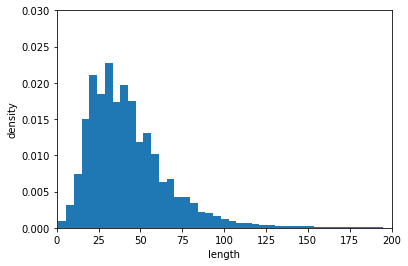

In [16]:
lengths = np.concatenate([lengths for _, lengths, _ in train_set.take(1000)])
plt.hist(lengths, bins=150, density=True)
plt.axis([0, 200, 0, 0.03])
plt.xlabel("length")
plt.ylabel("density")
plt.show()

In [17]:
def crop_long_sketches(dataset, max_length=100):
    return dataset.map(lambda inks, lengths, labels: (inks[:, :max_length], labels))

cropped_train_set = crop_long_sketches(train_set)
cropped_valid_set = crop_long_sketches(valid_set)
cropped_test_set = crop_long_sketches(test_set)

In [19]:
from tensorflow import keras
model = keras.models.Sequential([
    keras.layers.Conv1D(32, kernel_size=5, strides=2, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv1D(64, kernel_size=5, strides=2, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv1D(128, kernel_size=3, strides=2, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.LSTM(128, return_sequences=True),
    keras.layers.LSTM(128),
    keras.layers.Dense(len(class_names), activation="softmax")
])
optimizer = keras.optimizers.SGD(lr=1e-2, clipnorm=1.)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy", "sparse_top_k_categorical_accuracy"])
history = model.fit(cropped_train_set, epochs=2,
                    validation_data=cropped_valid_set)

Epoch 1/2
  18289/Unknown - 646s 35ms/step - loss: 5.4426 - accuracy: 0.0196 - sparse_top_k_categorical_accuracy: 0.0742

KeyboardInterrupt: 

In [ ]:
y_test = np.concatenate([labels for _, _, labels in test_set])
y_probas = model.predict(test_set)
np.mean(keras.metrics.sparse_top_k_categorical_accuracy(y_test, y_probas))
